#                     Term-1&2 Project - EDA on IPL dataset 

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mat
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
%matplotlib inline  
import pandas_profiling
import bokeh

In [3]:
ipl_matches = pd.read_csv("matches.csv")

In [4]:
ipl_matches.head(10)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
5,6,2017,Hyderabad,2017-04-09,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,9,Rashid Khan,"Rajiv Gandhi International Stadium, Uppal",A Deshmukh,NJ Llong,NaN
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
7,8,2017,Indore,2017-04-10,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
8,9,2017,Pune,2017-04-11,Delhi Daredevils,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Delhi Daredevils,97,0,SV Samson,Maharashtra Cricket Association Stadium,AY Dandekar,S Ravi,NaN
9,10,2017,Mumbai,2017-04-12,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN


In [5]:
ipl_matches.columns = map(str.lower, ipl_matches.columns)                                  # map() function returns a list of results after applying the given function
ipl_matches.dtypes                                                                      # to each item of a given iterabl

id                  int64
season              int64
city               object
date               object
team1              object
team2              object
toss_winner        object
toss_decision      object
result             object
dl_applied          int64
winner             object
win_by_runs         int64
win_by_wickets      int64
player_of_match    object
venue              object
umpire1            object
umpire2            object
umpire3            object
dtype: object

# Convert date to DateTime field

In [6]:
ipl_matches['date'] = pd.to_datetime(ipl_matches['date'])                        # Convert "timestamp" data type from object to datetime                      
ipl_matches.dtypes    

id                          int64
season                      int64
city                       object
date               datetime64[ns]
team1                      object
team2                      object
toss_winner                object
toss_decision              object
result                     object
dl_applied                  int64
winner                     object
win_by_runs                 int64
win_by_wickets              int64
player_of_match            object
venue                      object
umpire1                    object
umpire2                    object
umpire3                    object
dtype: object

In [8]:
ipl_matches.shape

(696, 18)

In [7]:
no_of_matches = len(ipl_matches.index)
no_of_matches

696

In [10]:
ipl_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 18 columns):
id                 696 non-null int64
season             696 non-null int64
city               689 non-null object
date               696 non-null datetime64[ns]
team1              696 non-null object
team2              696 non-null object
toss_winner        696 non-null object
toss_decision      696 non-null object
result             696 non-null object
dl_applied         696 non-null int64
winner             693 non-null object
win_by_runs        696 non-null int64
win_by_wickets     696 non-null int64
player_of_match    693 non-null object
venue              696 non-null object
umpire1            695 non-null object
umpire2            695 non-null object
umpire3            60 non-null object
dtypes: datetime64[ns](1), int64(5), object(12)
memory usage: 98.0+ KB


In [8]:
# Checking the count of null values in a column
ipl_matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

In [12]:
# Create overall profile of the IPL dataset using pandas_profiling
profile = pandas_profiling.ProfileReport(ipl_matches)
profile.to_file(outputfile="ipl_matches_before_preprocessing.html")

In [9]:
# Dropping umpire3 column for there are many missing values
ipl_matches.drop('umpire3', axis = 1,inplace = True)
ipl_matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


In [10]:
# Get the matches with no result
ipl_matches.loc[ipl_matches['result'] == 'no result']

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan


In [15]:
# First and Latest IPL seasons

first_ipl_season = min(ipl_matches.season)
print ("First IPL Season: {}".format(first_ipl_season))

recent_ipl_season = max(ipl_matches.season)
print ("Most recent IPL Season: {}".format(recent_ipl_season))       


First IPL Season: 2008
Most recent IPL Season: 2018


In [11]:
# ALL IPL Seasons
all_ipl_seasons = sorted(ipl_matches.season.unique())
print ("All seasons of IPL : {}".format(all_ipl_seasons))

All seasons of IPL : [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]


In [38]:
# Average matches played per season

print(no_of_matches/len(all_ipl_seasons))

63.27272727272727


In [12]:
#Number of matches played per season
ipl_matches['season'].value_counts().sort_index()

2008    58
2009    57
2010    60
2011    73
2012    74
2013    76
2014    60
2015    59
2016    60
2017    59
2018    60
Name: season, dtype: int64

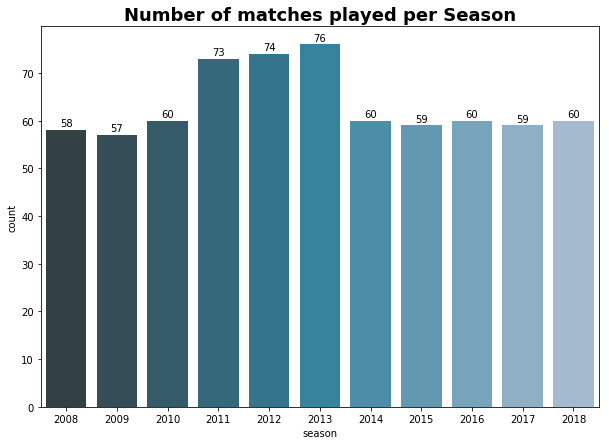

In [13]:
plt.figure(figsize=(10,7))
plt.title("Number of matches played per Season", fontsize=18, fontweight="bold")
plt.xlabel('Year')
plt.ylabel('No of Matches')

graph = sns.countplot('season', data = ipl_matches, order = ipl_matches['season'].value_counts().index.sort_values(), palette="PuBuGn_d")
graph.set_xticklabels(graph.get_xticklabels())

for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x() + p.get_width()/2, height + 0.8, height, ha="center")
    
plt.show()

In [255]:
teams = ipl_matches.team1.unique()
teams

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants'],
      dtype=object)

In [19]:
# Removing duplicate team names
team_superGiants = ['Rising Pune Supergiant', 'Rising Pune Supergiants']

def removeDuplicates(x):                                                    # We are going to apply this function
    if x in team_superGiants:                                               # on team1, team2, toss_winner, winner
        x = 'Rising Pune Supergiants'
    return x

In [20]:
#ipl_matches[['team1', 'team2', 'toss_winner', 'winner']].apply(removeDuplicates)
ipl_matches['team1'] = ipl_matches['team1'].apply(removeDuplicates)
ipl_matches['team2'] = ipl_matches['team2'].apply(removeDuplicates)
ipl_matches['toss_winner'] = ipl_matches['toss_winner'].apply(removeDuplicates)
ipl_matches['winner'] = ipl_matches['winner'].apply(removeDuplicates)

In [258]:
teams1_cleaned = ipl_matches.team1.unique()
teams1_cleaned

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors'], dtype=object)

In [259]:
teams2_cleaned = ipl_matches.team2.unique()
teams2_cleaned

array(['Royal Challengers Bangalore', 'Rising Pune Supergiants',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils',
       'Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rajasthan Royals', 'Chennai Super Kings', 'Deccan Chargers',
       'Pune Warriors', 'Kochi Tuskers Kerala'], dtype=object)

In [260]:
tosswinners_cleaned = ipl_matches.toss_winner.unique()
tosswinners_cleaned

array(['Royal Challengers Bangalore', 'Rising Pune Supergiants',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Sunrisers Hyderabad',
       'Mumbai Indians', 'Gujarat Lions', 'Delhi Daredevils',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors'], dtype=object)

In [261]:
winners_cleaned = ipl_matches.winner.unique()
winners_cleaned

array(['Sunrisers Hyderabad', 'Rising Pune Supergiants',
       'Kolkata Knight Riders', 'Kings XI Punjab',
       'Royal Challengers Bangalore', 'Mumbai Indians',
       'Delhi Daredevils', 'Gujarat Lions', 'Chennai Super Kings',
       'Rajasthan Royals', 'Deccan Chargers', 'Pune Warriors',
       'Kochi Tuskers Kerala', nan], dtype=object)

In [21]:
# Number of wins by each team in every season
ipl_matches.groupby(['season', 'winner'])['team1'].agg(['count']).head()


count
season winner                      
2008   Chennai Super Kings        9
       Deccan Chargers            2
       Delhi Daredevils           7
       Kings XI Punjab           10
       Kolkata Knight Riders      6

In [22]:
# Number of wins by each team overall
win_count = pd.DataFrame(ipl_matches.groupby(['winner'])['team1'].agg(['count']))
win_count

,count
winner,
Chennai Super Kings,90
Deccan Chargers,29
Delhi Daredevils,67
Gujarat Lions,13
Kings XI Punjab,76
Kochi Tuskers Kerala,6
Kolkata Knight Riders,86
Mumbai Indians,98
Pune Warriors,12


# Who is the most consistent team across all IPL seasons ?

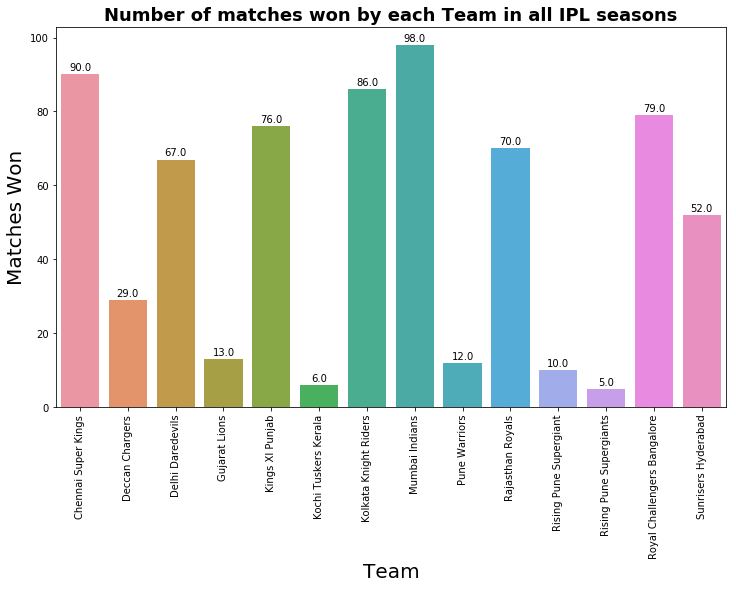

In [27]:
# Most CONSISTENT Team in IPL
plt.figure(figsize=(12,7))
plt.title("Number of matches won by each Team in all IPL seasons", fontsize=18, fontweight="bold")

winners_df = ipl_matches.groupby(['winner'])['team1'].agg(['count'])
winners_df.reset_index(inplace=True)

graph = sns.barplot(x='winner', y='count', data=winners_df);

graph.set_xticklabels(graph.get_xticklabels(), rotation=90)
graph.set_xlabel("Team",fontsize=20)
graph.set_ylabel("Matches Won",fontsize=20)

for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x() + p.get_width()/2, height + 1, height, ha="center")

plt.show()

###### Observation: - 'Mumbai Indians' has been the most successful team in the IPL, followed by 'Chennai Super Kings'

# Did the teams win the match when played at home ground ?

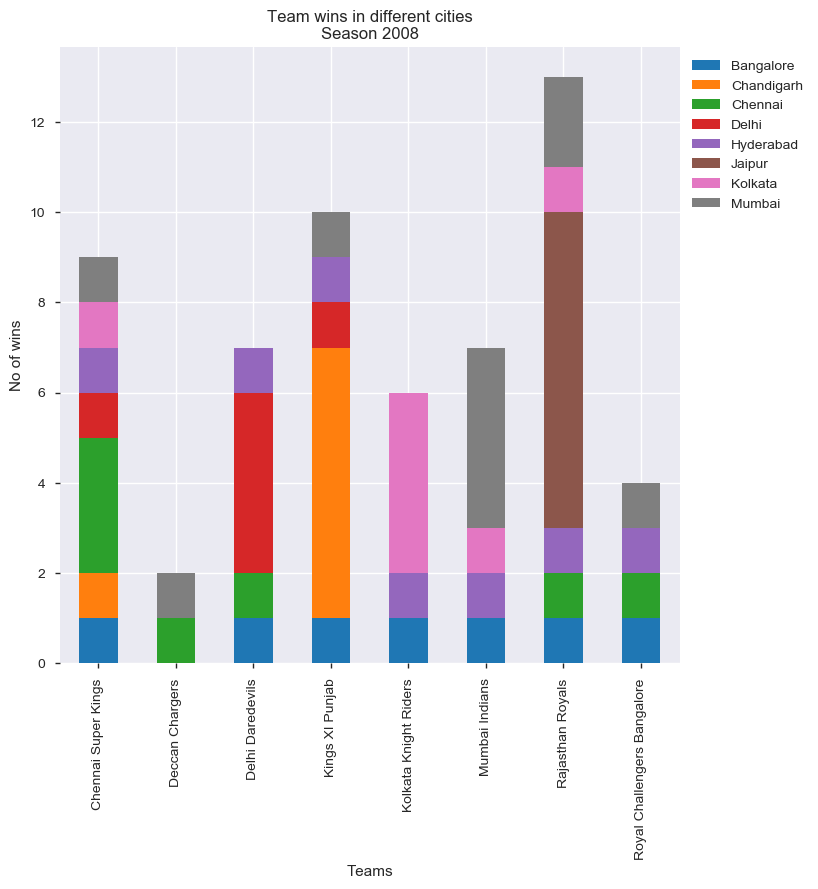

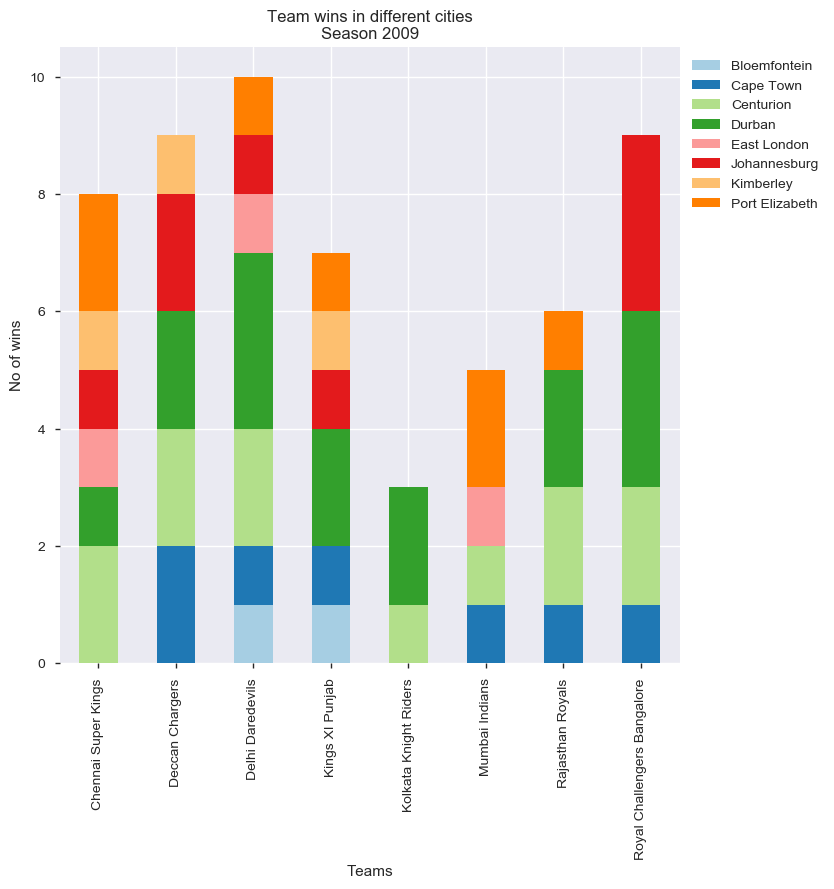

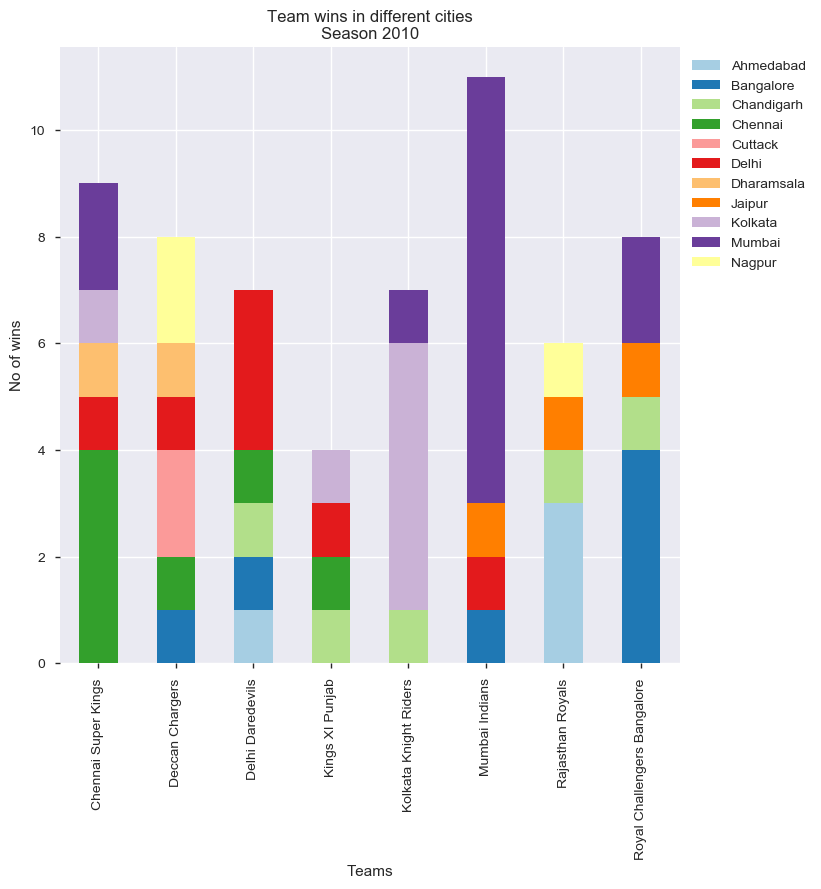

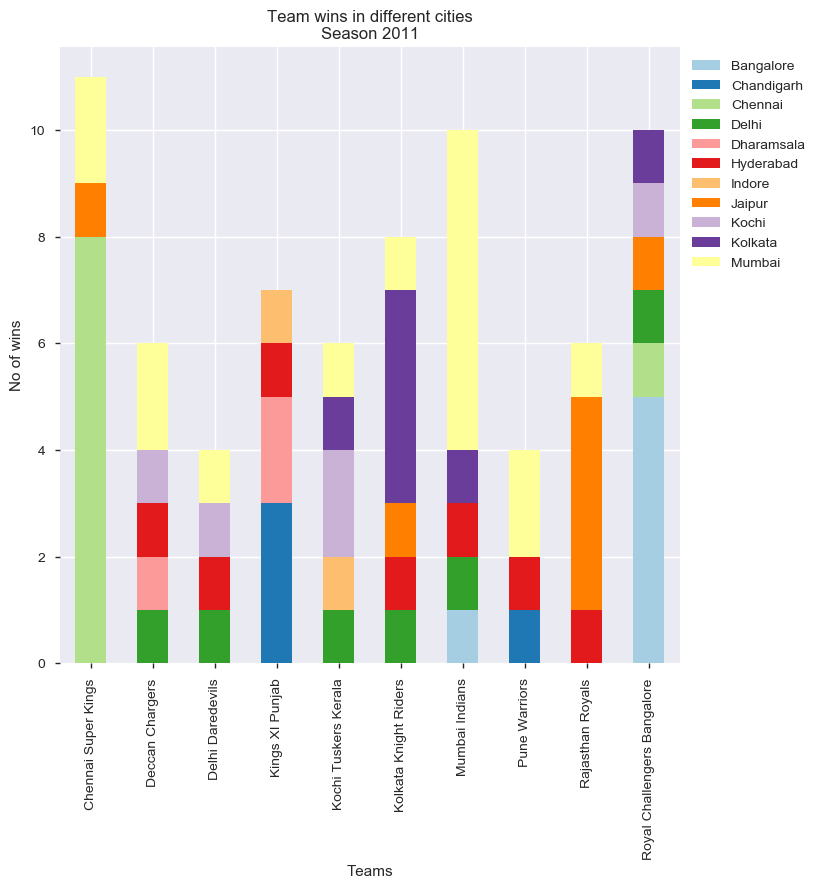

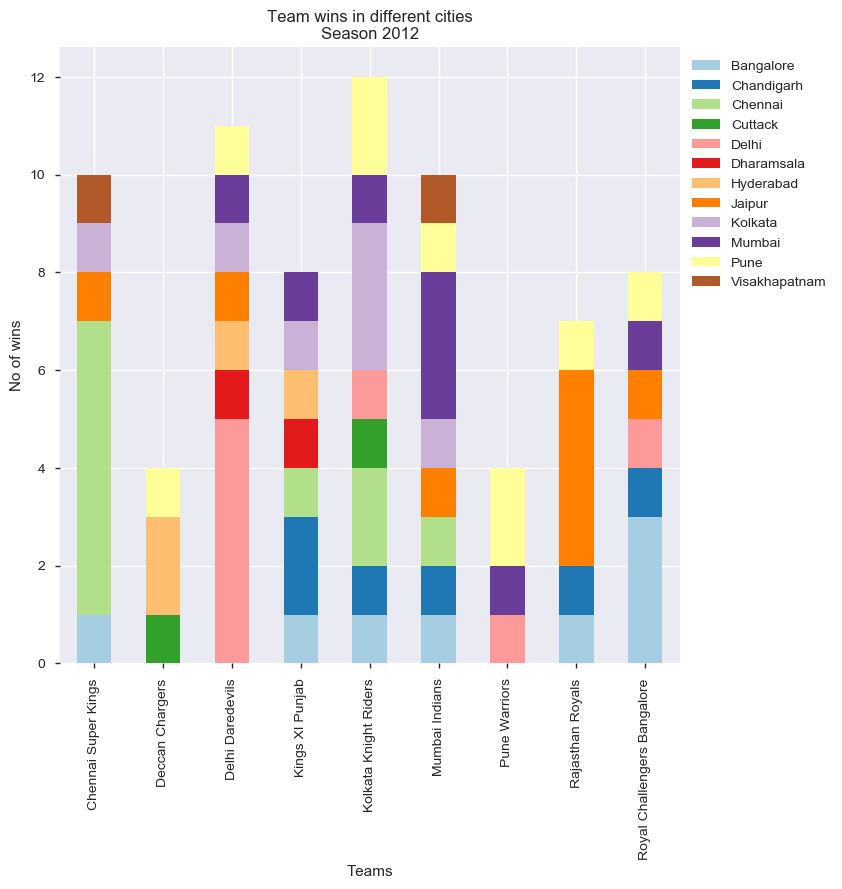

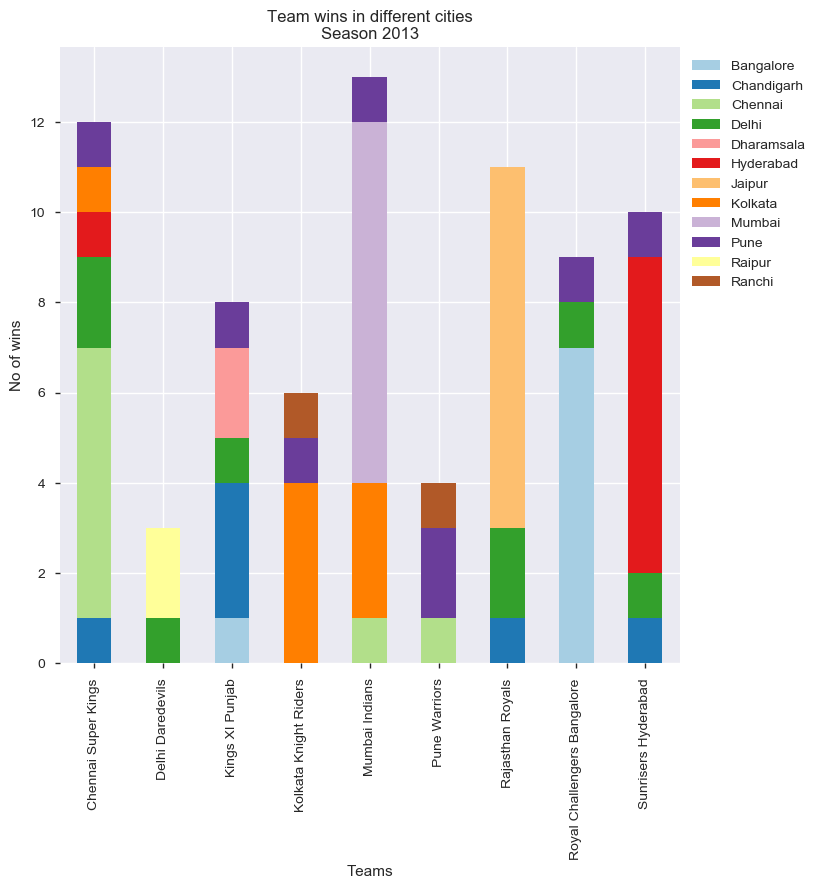

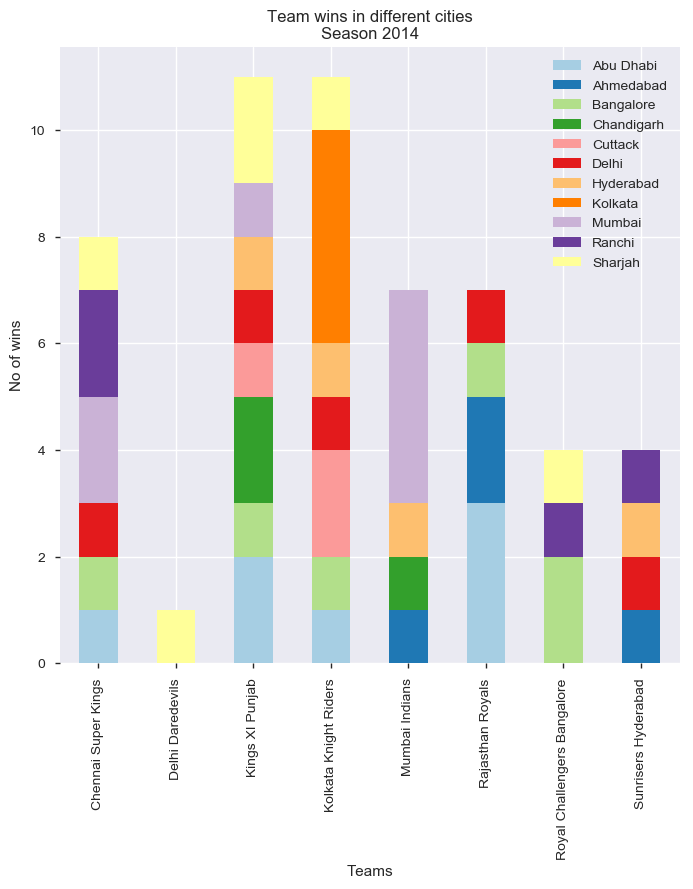

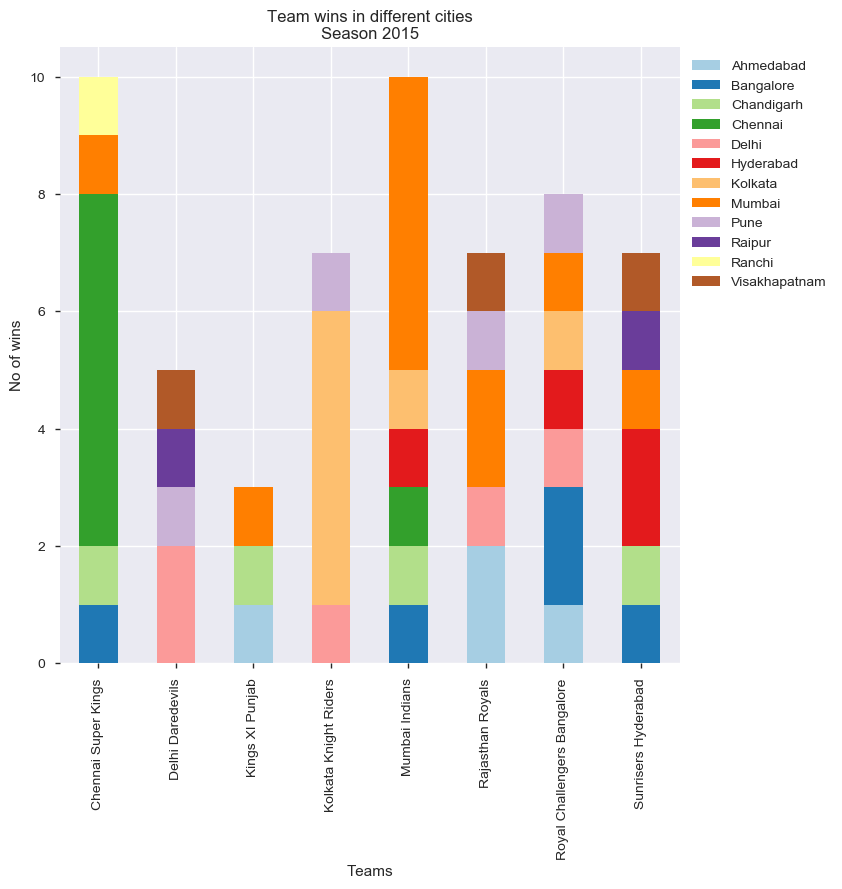

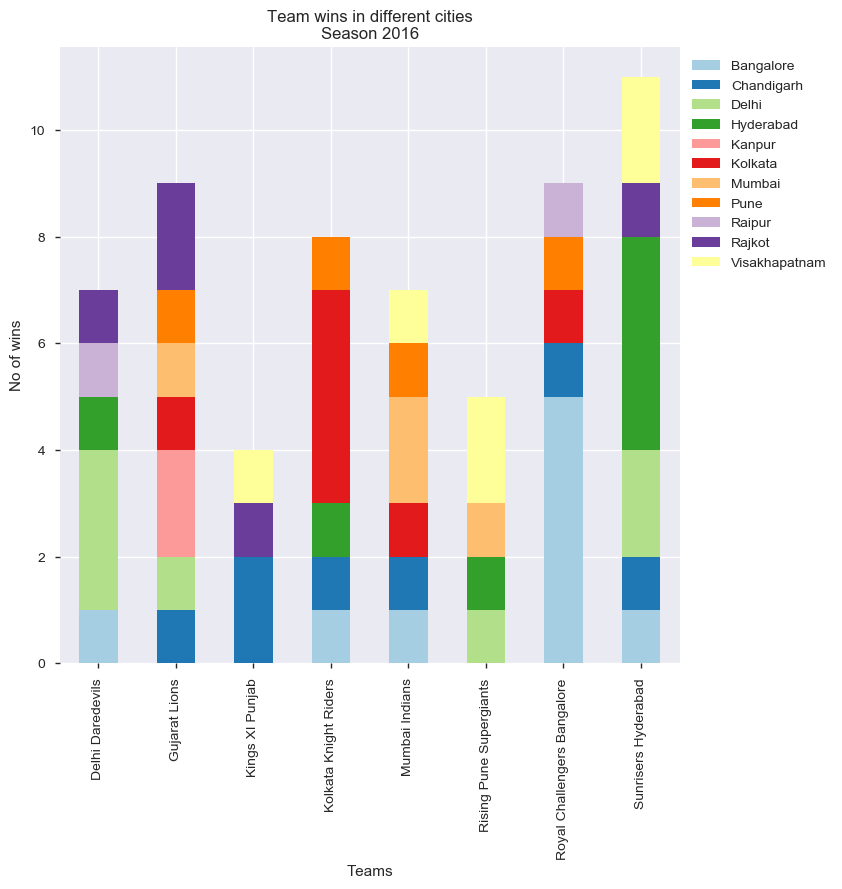

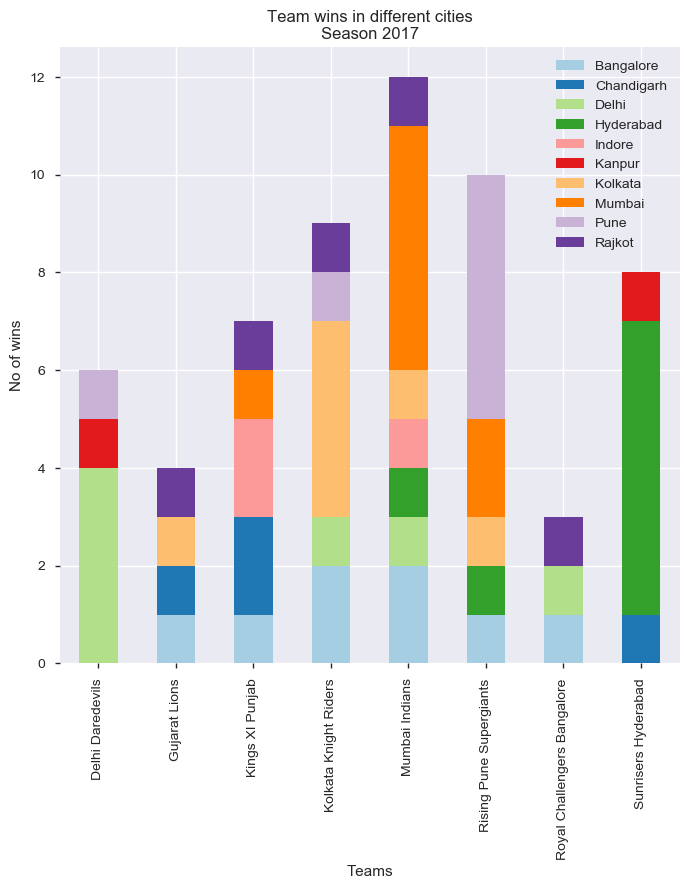

In [25]:
#No of wins by team and season in each city
x, y = 2008, 2018
while x < y:
    wins_percity = ipl_matches[ipl_matches['season'] == x].groupby(['winner', 'city'])['id'].count().unstack()
    plot = wins_percity.plot(kind='bar', stacked=True, title="Team wins in different cities\nSeason "+ str(x), figsize=(8, 8))
    sns.set_palette("Paired", len(ipl_matches['city'].unique()))
    plot.set_xlabel("Teams")
    plot.set_ylabel("No of wins")
    plot.legend(bbox_to_anchor=(1, 1), loc='best')
    x += 1

###### Observation: The teams have recorded more number of wins on their homeground. So there is a home ground advantage

# Did Toss play role in the match result ?

In [21]:
# number of times a team won when they won the toss
ipl_matches['toss_winner'].value_counts()

Mumbai Indians                 90
Kolkata Knight Riders          87
Delhi Daredevils               80
Chennai Super Kings            77
Royal Challengers Bangalore    77
Kings XI Punjab                75
Rajasthan Royals               69
Deccan Chargers                43
Sunrisers Hyderabad            42
Pune Warriors                  20
Gujarat Lions                  15
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

In [22]:
# Check if a team won the match if it won the toss on a particular day

toss_won = []
match_won = []

for (row, col) in ipl_matches.iterrows():

    if col.toss_winner == col.winner:
        toss_won.append('Yes')
        match_won.append('Yes')
    else:
        toss_won.append('Yes')
        match_won.append('No')
    
ipl_matches['toss_won'] = toss_won
ipl_matches['match_won'] = match_won

ipl_matches.head()


,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,toss_won,match_won
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,Yes,No
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,Yes,Yes
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,Yes,Yes
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,Yes,Yes
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,Yes,Yes


In [23]:
ipl_matches['match_won'].value_counts()

Yes    357
No     339
Name: match_won, dtype: int64

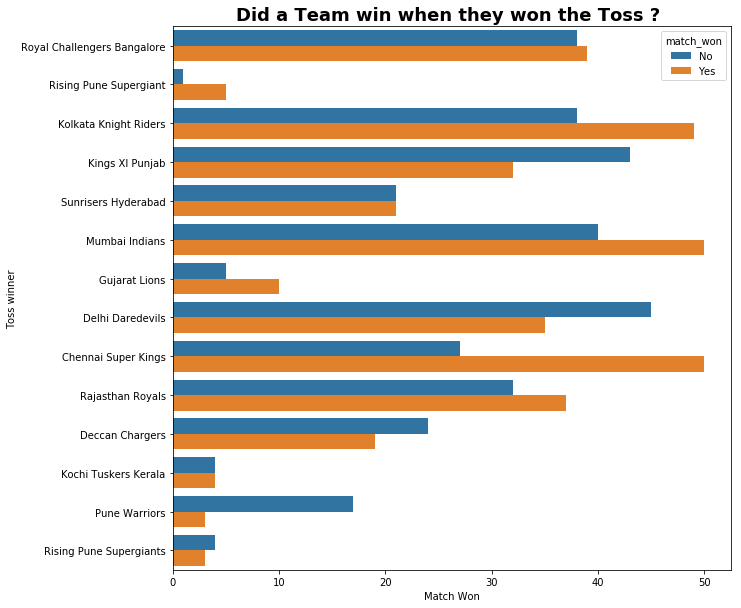

In [24]:
plt.figure(figsize=(10,10))
sns.countplot(y="toss_winner", hue="match_won", data=ipl_matches)
plt.title("Did a Team win when they won the Toss ? ", fontsize=18, fontweight="bold")
plt.ylabel("Toss winner")
plt.xlabel("Match Won")
plt.show()

###### Observation: Toss played mixed role in attaining match result. Mumbai Indians won the match most of the times when they won the toss. However, we can also see that Pune Warriors lost a match most of the times even when they won the toss

# Did the Toss Decision (bat or field) impact the match result ?

toss_decision
bat      283
field    413
Name: toss_decision, dtype: int64


Text(0, 0.5, 'Number of Matches')

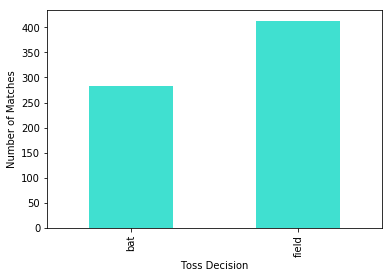

In [28]:
toss_decision_series = ipl_matches.groupby(ipl_matches.toss_decision).toss_decision.count()
print(toss_decision_series)
toss_decision_series.plot(kind='bar', color='turquoise')
plt.xlabel('Toss Decision')
plt.ylabel('Number of Matches')

###### Observation: Teams opted to field first most of the times on winning the Toss

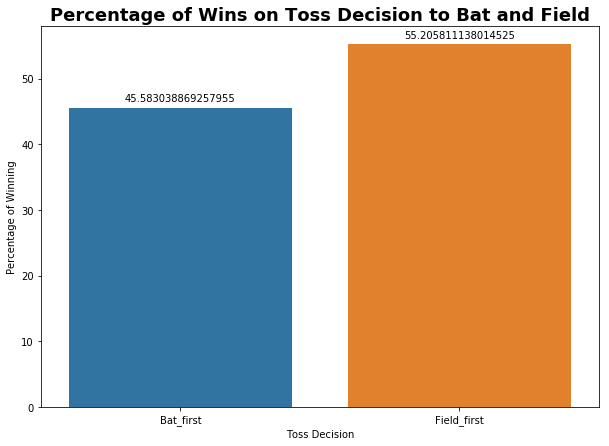

In [34]:
condition = ipl_matches.toss_decision =='bat'
bat_df = ipl_matches.loc[condition,:]
field_df = ipl_matches.loc[~condition,:]

percentage_when_batting_first_won  = (bat_df.toss_winner == bat_df.winner).mean() * 100
percentage_when_fielding_first_won = (field_df.toss_winner == field_df.winner).mean() * 100

win_percent_df = pd.DataFrame(['Bat_first', 'Field_first'], columns=['Toss_Decision'])
                            
win_percent_df['Percentage'] = [percentage_when_batting_first_won, percentage_when_fielding_first_won]
plt.figure(figsize=(10,7))
plt.title("Percentage of Wins on Toss Decision to Bat and Field", fontsize=18, fontweight="bold")
graph = sns.barplot(x='Toss_Decision', y='Percentage', data=win_percent_df)
plt.xlabel('Toss Decision')
plt.ylabel('Percentage of Winning')

for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x() + p.get_width()/2, height + 1, height, ha="center")

plt.show()

##### Observation: A toss decision to Field first had helped win more matches that opting to Bat first

# Most 'Player of the match' awards won in all IPL Seasons

Text(0, 0.5, 'Number of Awards')

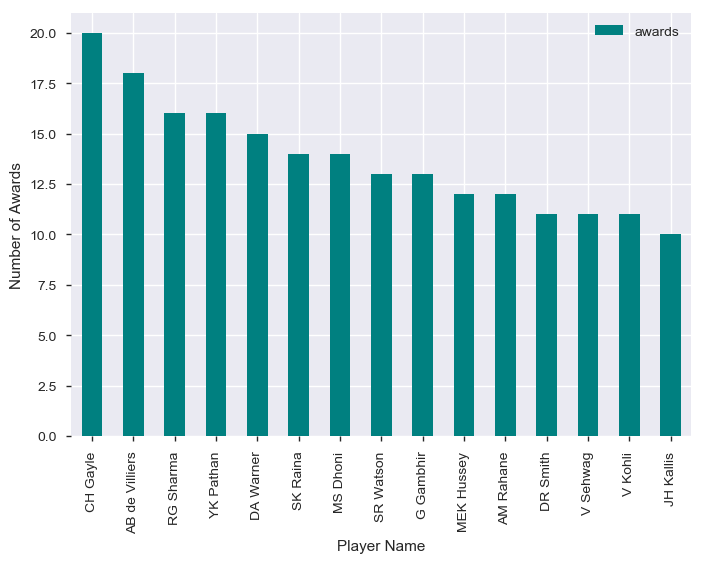

In [73]:
# Most Player of the Match award winning players in all IPL seasons
ipl_dream_15 = ipl_matches['player_of_match'].value_counts().head(15).reset_index()
ipl_dream_15 = ipl_dream_15.rename(columns = {"index": "player_name", 
                                  "player_of_match":"awards"}) 
ipl_dream_15.set_index("player_name").plot.bar(color='teal')
plt.xlabel('Player Name')
plt.ylabel('Number of Awards')



##### Observation: Chris Gayle has won the most 'Player of the Match'  awards